In [ ]:
# Importing the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/sample_data/Salary_Data.csv')
df.head(10)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32,Male,Bachelor's,Software Engineer,5.0,"$90,000.00",UK,White
1,1,28,Female,Master's,Data Analyst,3.0,"$65,000.00",USA,Hispanic
2,2,45,Male,PhD,Senior Manager,15.0,"$150,000.00",Canada,White
3,3,36,Female,Bachelor's,Sales Associate,7.0,"$60,000.00",USA,Hispanic
4,4,52,Male,Master's,Director,20.0,"$200,000.00",USA,Asian
5,5,29,Male,Bachelor's,Marketing Analyst,2.0,"$55,000.00",USA,Hispanic
6,6,42,Female,Master's,Product Manager,12.0,"$120,000.00",USA,Asian
7,7,31,Male,Bachelor's,Sales Manager,4.0,"$80,000.00",China,Korean
8,8,26,Female,Bachelor's,Marketing Coordinator,1.0,"$45,000.00",China,Chinese
9,9,38,Male,PhD,Senior Scientist,10.0,"$110,000.00",Australia,Australian


In [ ]:
df.shape

(6700, 9)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,2
Country,0
Race,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6700 non-null   int64  
 1   Age                  6700 non-null   int64  
 2   Gender               6700 non-null   object 
 3   Education Level      6700 non-null   object 
 4   Job Title            6700 non-null   object 
 5   Years of Experience  6700 non-null   float64
 6   Salary               6698 non-null   object 
 7   Country              6700 non-null   object 
 8   Race                 6700 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 471.2+ KB


In [ ]:
df=df.dropna()
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0
Country,0
Race,0


In [ ]:
df.duplicated().sum()
duplicates = df[df.duplicated()]
df= df.drop_duplicates()


In [ ]:
df.shape

(6698, 9)

## Education Leve

In [ ]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

Education Level Here same level with 2 different names are present, it can cause hinderance in our analysis so converting them to same level.

Master's Degree -> Master's

Bachelor's Degree -> Bachelor's

phD -> PhD

In [ ]:
df['Education Level']= df["Education Level"].str.replace("Master's Degree", "Master's")
df['Education Level']= df["Education Level"].str.replace("Bachelor's Degree", "Bachelor's")
df['Education Level']= df["Education Level"].str.replace("phD", "PhD")

In [ ]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

## Remove dollar signs and commas from the 'Salary' column and convert it to float


In [ ]:
df['Salary'] = df['Salary'].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
df.head(10)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52,Male,Master's,Director,20.0,200000.0,USA,Asian
5,5,29,Male,Bachelor's,Marketing Analyst,2.0,55000.0,USA,Hispanic
6,6,42,Female,Master's,Product Manager,12.0,120000.0,USA,Asian
7,7,31,Male,Bachelor's,Sales Manager,4.0,80000.0,China,Korean
8,8,26,Female,Bachelor's,Marketing Coordinator,1.0,45000.0,China,Chinese
9,9,38,Male,PhD,Senior Scientist,10.0,110000.0,Australia,Australian


In [ ]:
df['Country'].unique()


array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)

In [ ]:
# save clean dataset for EDA
df_clean = df
df_clean.to_csv('cleaned_Salary_Data.csv', index=False)

# Data Pre Processing


In [ ]:
df.head()


,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52,Male,Master's,Director,20.0,200000.0,USA,Asian


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()

array([1, 0, 2])

In [ ]:
df['Education Level']= label_encoder.fit_transform(df['Education Level'])
df['Education Level'].unique()

array([0, 2, 3, 1])

In [ ]:
df['Job Title']= label_encoder.fit_transform(df['Job Title'])
df['Job Title'].unique()

array([175,  18, 144, 115,  25,  93, 106, 118,  94, 165, 174,  47,  40,
       109,  14, 102,  96, 130,  19, 116,   4, 189,  53, 112,  41, 173,
       177,  66, 126, 105,   7,   1,  20,  97, 184,  46, 108,  17, 117,
       186, 101,  98,   2, 179,  11,   0,  33,  48,  13,   6,  38, 188,
        45, 187, 172,  34, 129,  56,  23,  52,  15,   5, 132, 190, 113,
       183,  12, 168,  50,  10, 182, 120,   9,  65,  39,  55, 159, 104,
       181, 148, 185, 114,  86, 110, 100, 107, 136,  90, 157,   8,  22,
        54, 145,  16, 134, 178, 180, 124,  71,  99, 103,  70, 155,  75,
       135, 119, 167,  89, 169, 161,  83,  73,  63, 156,  58, 163,  74,
        79, 123,  36,  80, 125, 153,  62, 143,  68, 152,  32,  87, 164,
        35,  61, 146, 139,  59, 122, 162,  69,  29,  72,  64, 150, 138,
       170,  78, 149, 142, 160,  37, 121,  26,  84, 140, 127,  31,  57,
        88, 147, 141, 131,  60,  85, 154,  77, 166,  81, 133, 137, 128,
        76,  30, 151,  67,  28, 176,   3, 158,  44,  43,  42,  2

In [ ]:
df['Country']= label_encoder.fit_transform(df['Country'])
df['Country'].unique()

array([3, 4, 1, 2, 0])

In [ ]:
df['Race']= label_encoder.fit_transform(df['Race'])
df['Race'].unique()

array([9, 5, 1, 6, 4, 2, 8, 0, 7, 3])

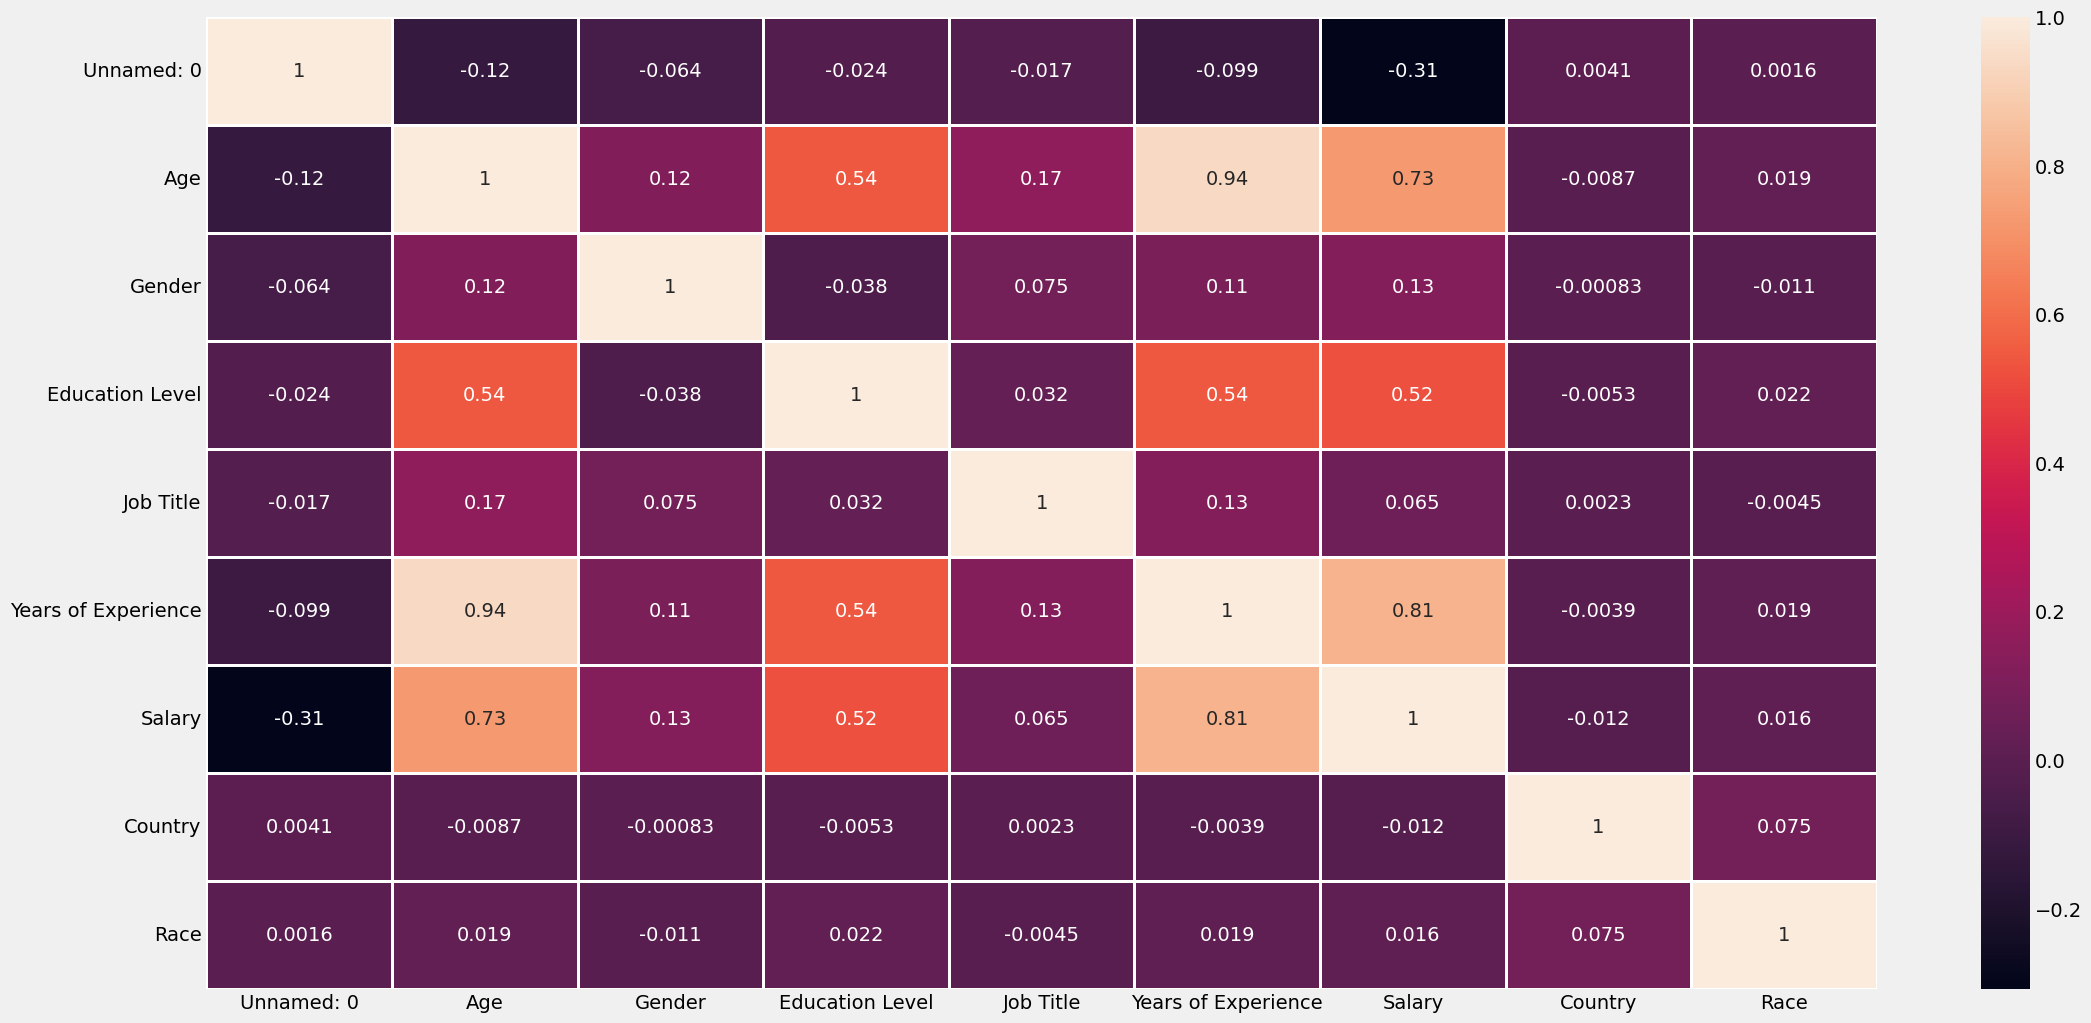

In [ ]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Salary'], axis = 1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [ ]:
X_train.head()


,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
4089,4092,43,1,3,20,16.0,1,3
2177,2180,33,0,0,44,6.0,0,2
5221,5224,25,1,0,87,1.0,4,0
457,459,30,0,0,18,5.0,0,1
6114,6118,40,0,0,41,16.0,2,9


# Machine Learning Models


In [ ]:
import os
import joblib

# ساخت پوشه models در صورت نیاز
if not os.path.exists('models'):
    os.makedirs('models')

models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(350)]

results = {'Model_Name': [], 'Mean_Absolute_Error_MAE': [], 'Mean_Absolute_Percentage_Error_MAPE': [],
           'Mean_Squared_Error_MSE': [], 'Root_Mean_Squared_Error_RMSE': [], 'R2_score': []}

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)

    model_name = model.__class__.__name__

    # ذخیره مدل
    joblib.dump(model, f"models/{model_name}.pkl")

    # ثبت نتایج
    results['Model_Name'].append(model_name)
    results['Mean_Absolute_Error_MAE'].append(mae)
    results['Mean_Absolute_Percentage_Error_MAPE'].append(mape)
    results['Mean_Squared_Error_MSE'].append(mse)
    results['Root_Mean_Squared_Error_RMSE'].append(rmse)
    results['R2_score'].append(r2)

Results = pd.DataFrame(results)


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Salary'], axis = 1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [ ]:
X_train.head()


,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Country,Race
4089,4092,43,1,3,20,16.0,1,3
2177,2180,33,0,0,44,6.0,0,2
5221,5224,25,1,0,87,1.0,4,0
457,459,30,0,0,18,5.0,0,1
6114,6118,40,0,0,41,16.0,2,9


# Machine Learning Models


In [ ]:
import os
import joblib

# ساخت پوشه models در صورت نیاز
if not os.path.exists('models'):
    os.makedirs('models')

models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(350)]

results = {'Model_Name': [], 'Mean_Absolute_Error_MAE': [], 'Mean_Absolute_Percentage_Error_MAPE': [],
           'Mean_Squared_Error_MSE': [], 'Root_Mean_Squared_Error_RMSE': [], 'R2_score': []}

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = metrics.mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)

    model_name = model.__class__.__name__

    # ذخیره مدل
    joblib.dump(model, f"models/{model_name}.pkl")

    # ثبت نتایج
    results['Model_Name'].append(model_name)
    results['Mean_Absolute_Error_MAE'].append(mae)
    results['Mean_Absolute_Percentage_Error_MAPE'].append(mape)
    results['Mean_Squared_Error_MSE'].append(mse)
    results['Root_Mean_Squared_Error_RMSE'].append(rmse)
    results['R2_score'].append(r2)

Results = pd.DataFrame(results)


In [ ]:
Results.head()


,Model_Name,Mean_Absolute_Error_MAE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Error_RMSE,R2_score
0,LinearRegression,21610.224266,30.797732,7.798604e+08,27925.981530,0.725289
1,DecisionTreeRegressor,2489.206468,7.376437,6.848042e+07,8275.289847,0.975877
2,RandomForestRegressor,2214.263555,7.132890,3.289958e+07,5735.815549,0.988411


In [ ]:
fig = px.bar(Results, x = 'Model_Name', y = 'Mean_Absolute_Error_MAE', color = 'Model_Name', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Model Name VS MAE', xaxis_title='Model_Name', yaxis_title='MAE')
fig.show()

In [ ]:
fig = px.bar(Results, x = 'Model_Name', y = 'Mean_Absolute_Percentage_Error_MAPE', color = 'Model_Name', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Model VS MAE %', xaxis_title='Model_Name', yaxis_title='MAE %')
fig.show()

In [ ]:
fig = px.bar(Results, x = 'Model_Name', y = 'Mean_Squared_Error_MSE', color = 'Model_Name', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Model Name VS MSE', xaxis_title='Model_Name', yaxis_title='MSE')
fig.show()

In [ ]:
fig = px.bar(Results, x = 'Model_Name', y = 'Root_Mean_Squared_Error_RMSE', color = 'Model_Name', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Model Name VS RMSE', xaxis_title='Model_Name', yaxis_title='RMSE')
fig.show()

In [ ]:
fig = px.bar(Results, x = 'Model_Name', y = 'R2_score', color = 'Model_Name', color_discrete_sequence=px.colors.sequential.Viridis)
fig.update_layout(title_text='Model Name VS R2_score', xaxis_title='Model_Name', yaxis_title='R Squared')
fig.show()